In [1]:
###WL-Load dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

C:\Users\wl030\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\wl030\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.BNVRK7633HSX7YVO2TADGR4A5KEKXJAW.gfortran-win_amd64.dll
C:\Users\wl030\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
###WL - Setup Dataframe
file = 'surface_master.csv'
df = pd.read_csv(file)

###WL - Filter out 0 < min delay < 20
df = df.loc[(df['Min Delay'] < 20) & (df['Min Delay'] > 0)]

In [3]:
#df['Month'].head()

In [4]:
#df.dtypes

In [5]:
#master_df = df

In [6]:
###WL - Logic to create a new column that calculates the season based on month value
winter_index = df[df['Month'].isin([12,1,2])].index
spring_index = df[df['Month'].isin([3,4,5])].index
summer_index = df[df['Month'].isin([6,7,8])].index
fall_index = df[df['Month'].isin([9,10,11])].index
#print(winter_index)
#print(fall_index)

In [7]:
###WL - Add the season to a new "Season" column.
df.loc[winter_index,'Season']="Winter"
df.loc[spring_index,'Season']="Spring"
df.loc[summer_index,'Season']="Summer"
df.loc[fall_index,'Season']="Fall"


In [8]:
###WL - Group the season_df for season and min delay
season_df = df.groupby('Season').agg({'Min Delay' : 'sum'}).reset_index()
#reset_season_df = season_df.reset_index()
#print(reset_season_df)
#print(season_df)
season_df

,Season,Min Delay
0,Fall,837976.0
1,Spring,931183.0
2,Summer,813892.0
3,Winter,922265.0


# Analysis of "Total Minutes Delay per Season" Plot
The plot shows that there are more total minutes delay in spring and winter than fall and summer

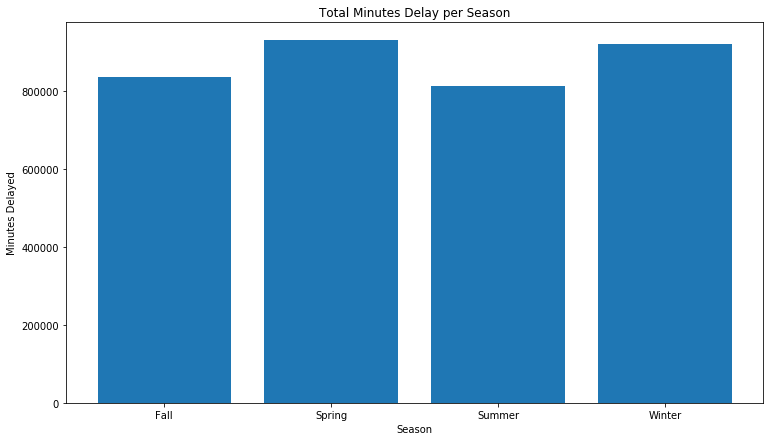

<Figure size 432x288 with 0 Axes>

In [61]:
###WL - plot the bar graph
fig, ax = plt.subplots(1, figsize = [12.5, 7])
plt.xlabel('Season')
plt.ylabel('Minutes Delayed')
plt.title("Total Minutes Delay per Season")
ax.bar(season_df['Season'], season_df['Min Delay'])

plt.show()
plt.savefig('min_delay_season.png')

In [10]:
###WL - Group the season_df for season and min delay
count_df = df.groupby('Season').agg({'Min Delay' : 'count'}).reset_index()
count_df

,Season,Min Delay
0,Fall,95946
1,Spring,108654
2,Summer,91466
3,Winter,107350


# Analysis of "Total Number of Incidents per Season" Plot
However the difference between fall and summer versuses spring and winter can be explained because there are more number of indicents that occur in spring and winter.

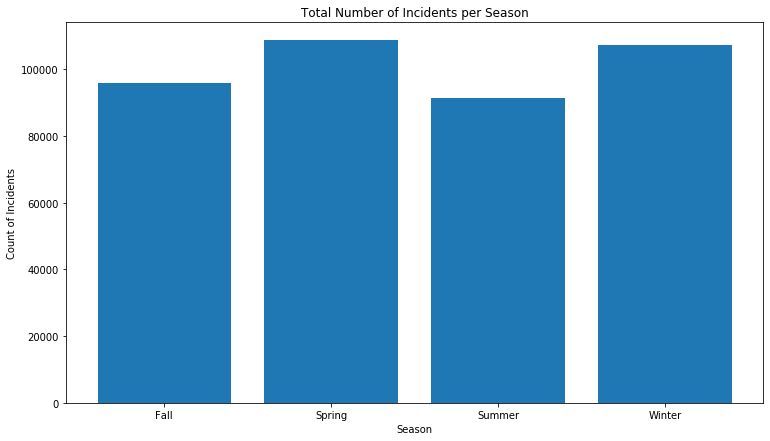

<Figure size 432x288 with 0 Axes>

In [63]:
###WL - plot the bar graph
fig, ax = plt.subplots(1, figsize = [12.5, 7])
plt.xlabel('Season')
plt.ylabel('Count of Incidents')
plt.title("Total Number of Incidents per Season")
ax.bar(count_df['Season'], count_df['Min Delay'])

plt.show()
plt.savefig('incidents_season.png')

In [12]:
#reset_season_df.dtypes

In [13]:
#season_name = ['Winter','Spring','Summer','Fall']
#plt.bar(season_name,reset_season_df)

In [14]:
#reset_season_df = reset_season_df.rename(columns={'Min Delay': 'Min_Delay'})

In [15]:
#print(reset_season_df)
#ax = reset_season_df.plot.bar(x='Season',y = 'Min_Delay')
#plt.show()



In [16]:
#df['Season'].nunique()

In [17]:
#df.head()

# Analysis of "Boxplot grouped by Season" Plot
The boxplot shows that the average length of delay is higher in fall and spring.

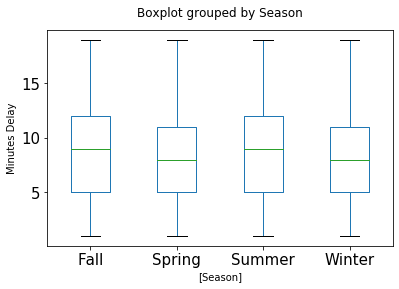

In [64]:
###WL - plot the boxgraph
boxplot_df = df[['Min Delay', 'Season']]
#df = df.loc[(df['Min Delay'] < 20) & (df['Min Delay'] > 0)]

boxplot_df.boxplot(by='Season',grid=False, fontsize=15)
plt.title("")
plt.ylabel("Minutes Delay")
plt.savefig('min_delay_boxplot.png')

In [28]:
###WL - Incident breakdown by season
incident_df  = df.groupby(['Incident', 'Season']).agg({'Incident' : 'count'})#.reset_index()
incident_df


Incident
Incident                         Season          
Diversion                        Fall        1875
                                 Spring      2069
                                 Summer      1848
                                 Winter      1557
Emergency Services               Fall        1924
                                 Spring      2307
                                 Summer      1923
                                 Winter      1945
General Delay                    Fall       12789
                                 Spring     11982
                                 Summer      9609
                                 Winter     10009
Held By                          Fall        1250
                                 Spring      1584
                                 Summer      1260
                                 Winter      1561
Investigation                    Fall        9242
                                 Spring     10965
                                 Summer      9059
                                 Winter      9610
Late Leaving Garage              Fall       16841
                                 Spring     15763
                                 Summer     13520
                                 Winter     18673
Late Leaving Garage - Management Spring         8
Late Leaving Garage - Mechanical Spring        42
Late Leaving Garage - Operator   Spring        22
Mechanical                       Fall       36593
                                 Spring     45748
                                 Summer     38606
                                 Winter     46057
Overhead - Pantograph            Fall          27
                                 Spring        35
                                 Summer         9
                                 Winter        26
Utilized Off Route               Fall       15405
                                 Spring     17253
                                 Summer     15629
                                 Winter     17912
Vision                           Spring        53
                                 Summer         2

# Analysis of "Count of Incident grouped by Incident and Season" Plot
We can see that "Mechanical" and "Utilized off Route" incidents occur more frequently in spring and winter

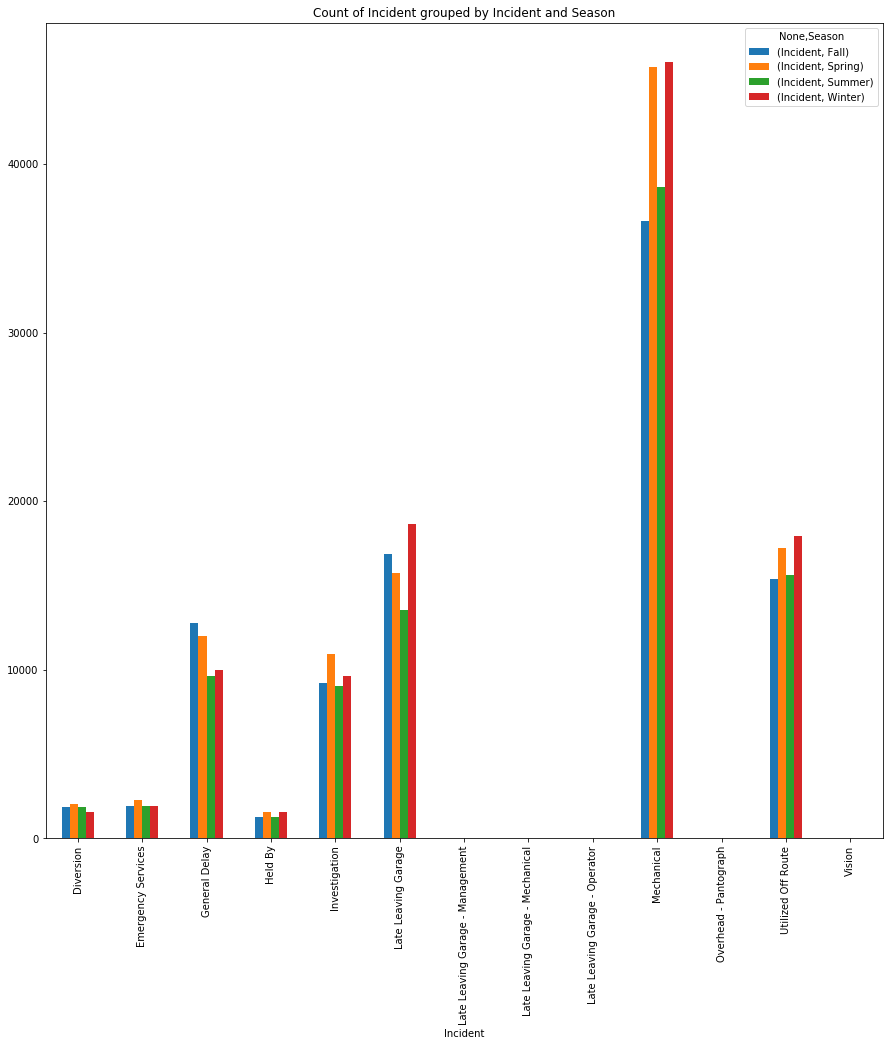

In [65]:
season_name = ['Winter','Spring','Summer','Fall']
incident_name = incident_df['Incident']
#incident_df.plot.bar(x = incident_name, y = ['Winter','Spring','Summer','Fall'])
#incident_df.unstack().plot.bar(figsize = (100,100))
incident_df.unstack().plot.bar(figsize = (15,15), title = "Count of Incident grouped by Incident and Season")
plt.savefig('incident_by_season.png')

In [46]:
###WL - Incident breakdown by season
incident_mean_df  = df.groupby(['Incident', 'Season']).agg({'Min Delay' : 'mean'})#.reset_index()
incident_mean_df

Min Delay
Incident                         Season           
Diversion                        Fall     8.186133
                                 Spring   8.323828
                                 Summer   7.532468
                                 Winter   8.228003
Emergency Services               Fall     9.202703
                                 Spring   9.201994
                                 Summer   9.417057
                                 Winter   9.175835
General Delay                    Fall    11.240754
                                 Spring  10.983642
                                 Summer  11.075970
                                 Winter  10.916076
Held By                          Fall     9.048800
                                 Spring   8.957071
                                 Summer   9.546032
                                 Winter   8.941704
Investigation                    Fall     8.999351
                                 Spring   8.853808
                                 Summer   8.940722
                                 Winter   9.047451
Late Leaving Garage              Fall     8.430259
                                 Spring   8.026772
                                 Summer   8.583284
                                 Winter   8.420447
Late Leaving Garage - Management Spring   5.125000
Late Leaving Garage - Mechanical Spring   9.357143
Late Leaving Garage - Operator   Spring   7.318182
Mechanical                       Fall     8.553303
                                 Spring   8.529007
                                 Summer   8.847873
                                 Winter   8.512018
Overhead - Pantograph            Fall     6.296296
                                 Spring   7.057143
                                 Summer   7.777778
                                 Winter   6.230769
Utilized Off Route               Fall     7.240831
                                 Spring   7.193358
                                 Summer   7.977350
                                 Winter   7.369864
Vision                           Spring  10.452830
                                 Summer  11.000000

# Analysis of "Mean Mintues Delayed grouped by Incident and Season" Plot
"Mechanical" and "Utilized off Route" mean mintues delayed are consistant across seasons.

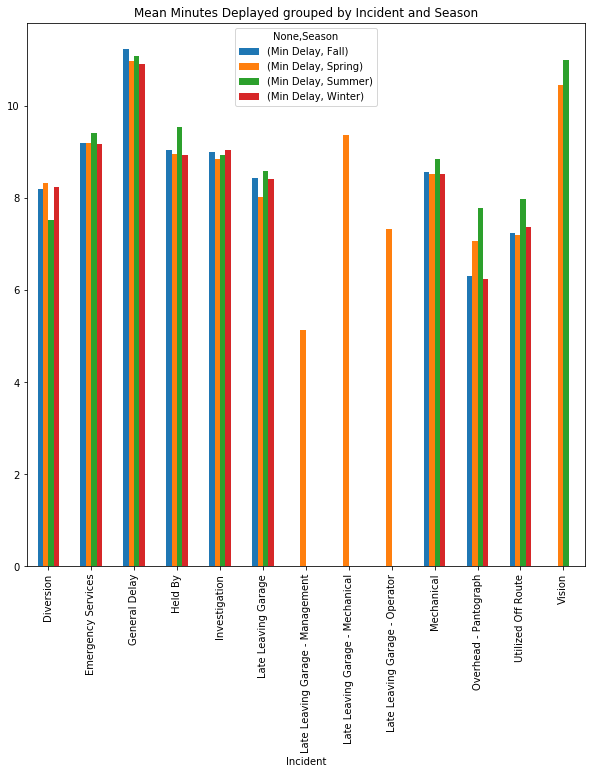

In [66]:
incident_mean_df.unstack().plot.bar(figsize = (10,10), title = "Mean Minutes Deplayed grouped by Incident and Season")
plt.savefig('mean_min_delay_boxplot.png')

# Analysis of "Mean Temp" Plot
"Mechanical" incidents occur more frequently at 0 degrees and 20 degrees.

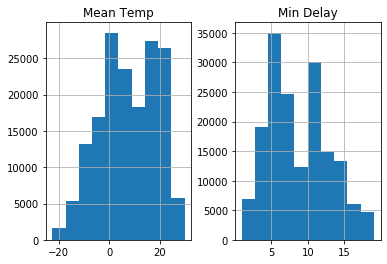

In [67]:
mechanical_df = df[df.Incident == 'Mechanical']
mechanical_df1 = mechanical_df[['Min Delay','Mean Temp']]
mechanical_df1.hist()
plt.savefig('histo.png')

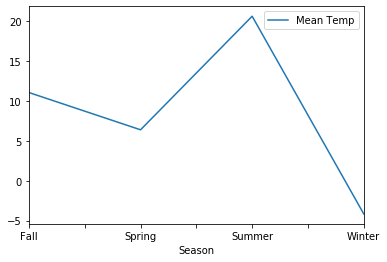

In [59]:
temp_df = df.groupby(['Season']).agg({'Mean Temp' : 'mean'})#.reset_index()
temp_df
temp_df.plot.line()

In [19]:
###WL
group1 = df[df["Season"] == "Fall"]["Min Delay"]
group2 = df[df["Season"] == "Winter"]["Min Delay"]
group3 = df[df["Season"] == "Spring"]["Min Delay"]
group4 = df[df["Season"] == "Summer"]["Min Delay"]


In [20]:
###WL
stats.f_oneway(group1,group2,group3,group4)

F_onewayResult(statistic=119.22722955081571, pvalue=3.503694823182298e-77)

# Summary
Null Hypothesis: Seasonality (fall, winter, summer, spring) has no significant impact on TTC surface route (bus and streetcar) delays.

Alternate Hypothesis: Seasonality has a significant impact on TTC surface route delays.

Analysis: Based on the ANOVA test we have a p-value less than 0.05, so we are rejecting the null hypothesis.  Therefore, seasonality has a significant impact on TTC surface route delays.
